<a href="https://colab.research.google.com/github/tanboi85/hadoop/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import important libarery 
import pandas as pd
import numpy as np

# import dataset and add columm names to the imporated dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Cleaned-Data.csv')


# Show the the tope 5 obersrvation of the dataset
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


In [ ]:
# Map True/False to 1/0 in DataFrame
for col in data.columns[:-1]:
  data[col] = data[col].astype(bool)

# Show the the tope 5 obersrvation of the dataset
data.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,China
1,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,China
2,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,China
3,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,China
4,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,China


In [ ]:
#show the number of attributes and observationsdata.shape
data.shape

(316800, 27)

In [ ]:
# create a column with null values 
df = data.copy(deep = True)
df['merged'] = None

# merge Contact_Yes and Country colunms into a new colunms
for ind in df.index:
  if df['Contact_Yes'][ind] == True:
    df['merged'][ind] = df['Country'][ind]+'_True'
  if df['Contact_Yes'][ind] == False:
    df['merged'][ind] = df['Country'][ind]+'_Flase'

# Show the the tope 5 obersrvation of the dataset
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,merged
0,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,China,China_True
1,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,China,China_Flase
2,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,China,China_Flase
3,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,China,China_True
4,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,China,China_Flase


In [ ]:
# Convert categorical variable to numeric
cleanup_nums = {"Gender_Female": {False: "Gender_Female_False", True: "Gender_Female_True"},
                "Gender_Male": {False: "Gender_Male_False", True: "Gender_Male_True"},
                "Gender_Transgender": {False: "Gender_Transgender_False", True: "Gender_Transgender_True" },
                "Severity_Mild": {False: "Severity_Mild_False", True: "Severity_Mild_True" },
                "Severity_Moderate": {False: "Severity_Moderate_False", True: "Severity_Moderate_True" },
                "Severity_None": {False: "Severity_None_False", True: "Severity_None_True" },
                "Severity_Severe": {False: "Severity_Severe_False", True: "Severity_Severe_True" }}

df.replace(cleanup_nums, inplace=True)
df.head(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,merged
0,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,False,False,True,China,China_True
1,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,False,True,False,China,China_Flase
2,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,True,False,False,China,China_Flase
3,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,False,True,China,China_True
4,True,True,True,True,True,False,True,True,True,True,False,True,False,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,True,False,China,China_Flase


In [ ]:
#show the number of attributes and observationsdata.shape
df.shape

(316800, 28)

In [ ]:
# Create a copy of the df and shuffle it
df_shuffle = df.copy(deep = True)
df_shuffle = df_shuffle.sample(frac=1).reset_index(drop=True)

# Show the the tope 5 obersrvation of the dataset
df_shuffle.head(15)



,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,merged
0,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,True,Gender_Female_False,Gender_Male_False,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_False,Severity_None_False,Severity_Severe_True,False,True,False,UAE,UAE_Flase
1,False,False,True,True,True,False,True,True,True,False,False,False,False,False,False,True,Gender_Female_False,Gender_Male_False,Gender_Transgender_True,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,False,True,False,China,China_Flase
2,True,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_True,Severity_Moderate_False,Severity_None_False,Severity_Severe_False,False,True,False,Italy,Italy_Flase
3,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_False,Severity_None_False,Severity_Severe_True,False,False,True,Republic of Korean,Republic of Korean_True
4,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,False,True,Other-EUR,Other-EUR_True
5,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,Gender_Female_False,Gender_Male_False,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_False,Severity_None_True,Severity_Severe_False,False,False,True,Iran,Iran_True
6,True,True,True,False,False,False,True,True,True,False,False,False,True,False,False,False,Gender_Female_False,Gender_Male_False,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_False,Severity_None_False,Severity_Severe_True,True,False,False,Other,Other_Flase
7,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,True,Gender_Female_True,Gender_Male_False,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,True,False,False,Other-EUR,Other-EUR_Flase
8,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,Gender_Female_False,Gender_Male_True,Gender_Transgender_False,Severity_Mild_False,Severity_Moderate_False,Severity_None_False,Severity_Severe_True,False,True,False,Italy,Italy_Flase
9,False,False,False,True,False,False,False,True,True,True,False,True,False,False,False,False,Gender_Female_False,Gender_Male_False,Gender_Transgender_True,Severity_Mild_False,Severity_Moderate_True,Severity_None_False,Severity_Severe_False,False,True,False,Spain,Spain_Flase


In [ ]:
#select feature columns from dataset
null_data = df_shuffle.iloc[:,:]

# find null vule for all attributes and sum totall number
null_data.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
merged                     0
dtype: int64

In [ ]:
# Create a copy of dataframe for objective 1 and save the file as csv
col_obj1 = ['Gender_Female','Gender_Male','Gender_Transgender']
df_obj1 = df_shuffle[col_obj1].copy(deep = True)
df_obj1.to_csv('df_obj1.csv',index=False,header=False,sep=',')

# Create a copy of dataframe for objective 2 and save the file as csv
col_obj2 = ['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe']
df_obj2 = df_shuffle[col_obj2].copy(deep = True)
df_obj2.to_csv('df_obj2.csv',index=False,header=False,sep=',')

# Create a copy of dataframe for objective 3 and save the file as csv
col_obj3 = ['merged']
df_obj3 = df_shuffle[col_obj3].copy(deep = True)
df_obj3.to_csv('df_obj3.csv',index=False,header=False,sep=',')


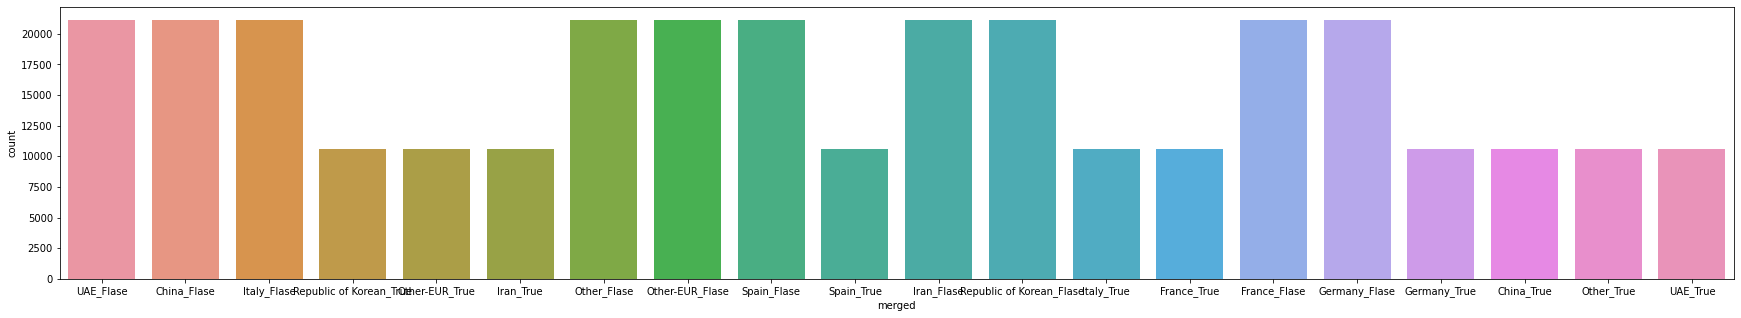

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,5))
# count rows of each classes
sns.countplot(x="merged", data=df_shuffle)

In [ ]:
# count class lables
for i in df_obj3.columns:
    print('Attribute name:',i)
    print('-------------------')
    print(df_obj3[i].value_counts())
    print('-------------------')

Attribute name: merged
-------------------
Spain_Flase                 21120
Other-EUR_Flase             21120
Germany_Flase               21120
Iran_Flase                  21120
Other_Flase                 21120
UAE_Flase                   21120
China_Flase                 21120
France_Flase                21120
Italy_Flase                 21120
Republic of Korean_Flase    21120
Other-EUR_True              10560
Italy_True                  10560
France_True                 10560
UAE_True                    10560
Germany_True                10560
Other_True                  10560
Spain_True                  10560
China_True                  10560
Iran_True                   10560
Republic of Korean_True     10560
Name: merged, dtype: int64
-------------------


In [ ]:
df_obj3.head(15)

,merged
0,UAE_Flase
1,China_Flase
2,Italy_Flase
3,Republic of Korean_True
4,Other-EUR_True
5,Iran_True
6,Other_Flase
7,Other-EUR_Flase
8,Italy_Flase
9,Spain_Flase
